In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "trentino-alto adige"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,4,Trentino-Alto Adige,1,0,1,0,1,1,1,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,4,Trentino-Alto Adige,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,4,Trentino-Alto Adige,1,0,1,0,1,0,0,...,0.0,30.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,4,Trentino-Alto Adige,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,4,Trentino-Alto Adige,1,0,1,0,1,0,0,...,0.0,25.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2020-12-06T17:00:00,4,Trentino-Alto Adige,824,80,904,12434,13338,-293,464,...,8.0,5367.0,1601.0,-304.0,8.85,6.78,8.65,28.98,1.27,-2.15
286,2020-12-07T17:00:00,4,Trentino-Alto Adige,828,81,909,12525,13434,96,320,...,21.0,1481.0,593.0,91.0,8.91,6.77,21.61,53.96,1.25,0.72
287,2020-12-08T17:00:00,4,Trentino-Alto Adige,909,78,987,12353,13340,-94,228,...,23.0,3227.0,1068.0,-172.0,7.90,7.40,7.07,21.35,-3.70,-0.70
288,2020-12-09T17:00:00,4,Trentino-Alto Adige,827,78,905,12495,13400,60,414,...,26.0,4136.0,750.0,142.0,8.62,6.75,10.01,55.20,0.00,0.45


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 10, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 461
Nuovi tamponi: 4673.0
Percentuale nuovi positivi/nuovi tamponi: 9.9 %
Nuovi guariti: 677.0
Nuovi deceduti: 17.0
Variazione positivi ricoverati con sintomi: -157.0
Variazione positivi in terapia intensiva: 1.0
Variazione positivi in isolamento dimiciliare: -77.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 10, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-11T17:00:00,4,Trentino-Alto Adige,54,1,55,1566,1621,61,123,...,1.0,3446.0,1292.0,62.0,1.82,3.39,3.57,9.52,-50.00,3.91
1,2020-10-12T17:00:00,4,Trentino-Alto Adige,61,2,63,1590,1653,32,47,...,1.0,1172.0,574.0,24.0,3.17,3.81,4.01,8.19,100.00,1.97
2,2020-10-13T17:00:00,4,Trentino-Alto Adige,74,3,77,1602,1679,26,62,...,2.0,1484.0,725.0,12.0,3.90,4.59,4.18,8.55,50.00,1.57
3,2020-10-14T17:00:00,4,Trentino-Alto Adige,74,3,77,1699,1776,97,153,...,2.0,4140.0,1285.0,97.0,3.90,4.34,3.70,11.91,0.00,5.78
4,2020-10-15T17:00:00,4,Trentino-Alto Adige,80,3,83,1778,1861,85,160,...,2.0,3398.0,1290.0,79.0,3.61,4.46,4.71,12.40,0.00,4.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-06T17:00:00,4,Trentino-Alto Adige,824,80,904,12434,13338,-293,464,...,8.0,5367.0,1601.0,-304.0,8.85,6.78,8.65,28.98,1.27,-2.15
57,2020-12-07T17:00:00,4,Trentino-Alto Adige,828,81,909,12525,13434,96,320,...,21.0,1481.0,593.0,91.0,8.91,6.77,21.61,53.96,1.25,0.72
58,2020-12-08T17:00:00,4,Trentino-Alto Adige,909,78,987,12353,13340,-94,228,...,23.0,3227.0,1068.0,-172.0,7.90,7.40,7.07,21.35,-3.70,-0.70
59,2020-12-09T17:00:00,4,Trentino-Alto Adige,827,78,905,12495,13400,60,414,...,26.0,4136.0,750.0,142.0,8.62,6.75,10.01,55.20,0.00,0.45


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

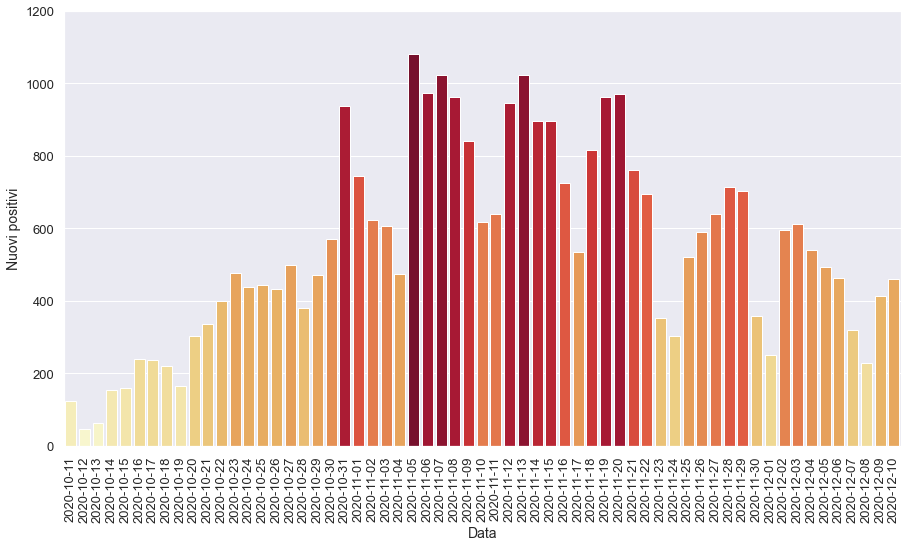

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

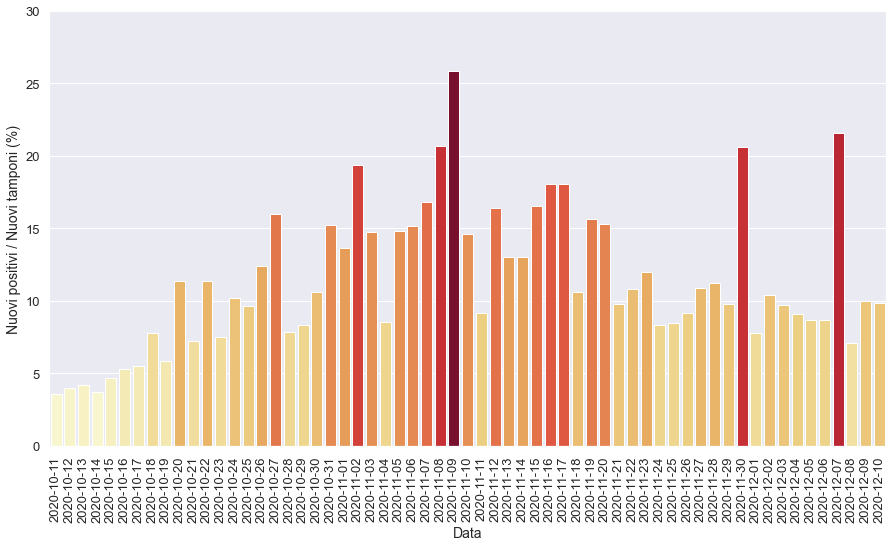

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

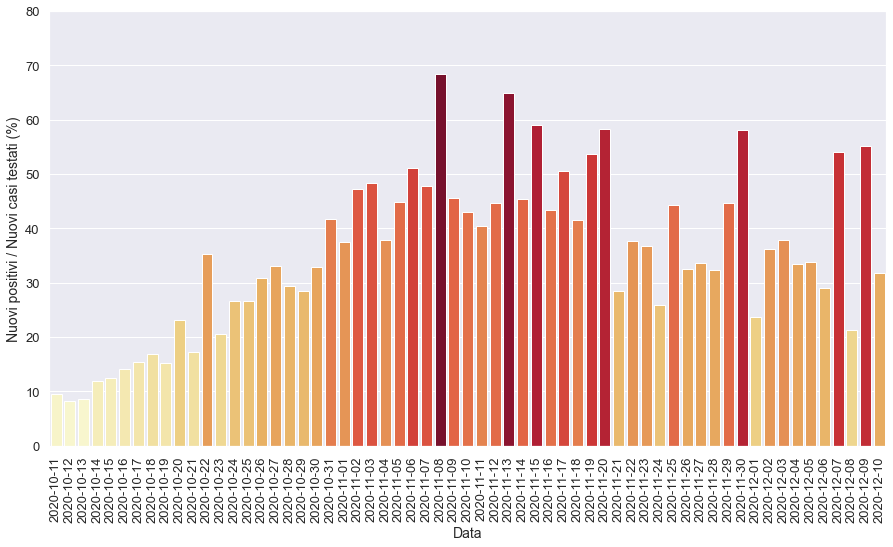

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

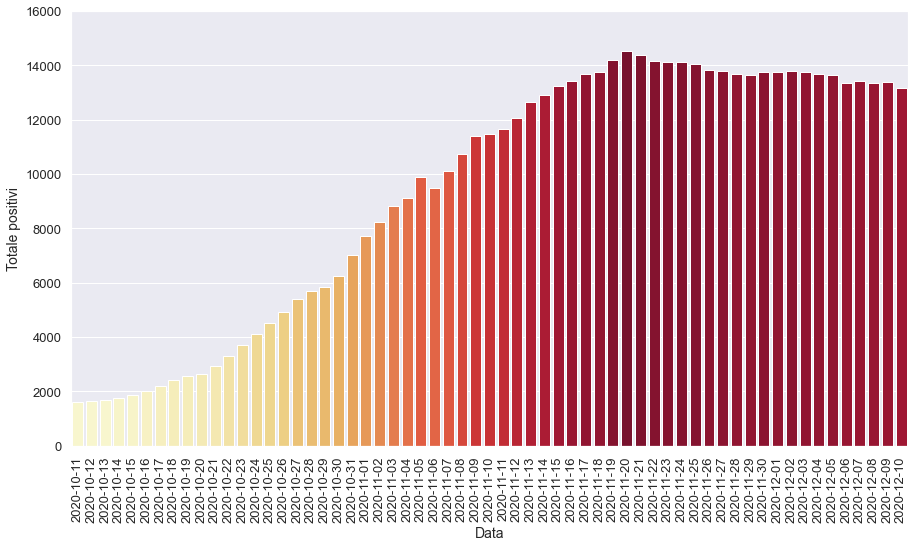

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

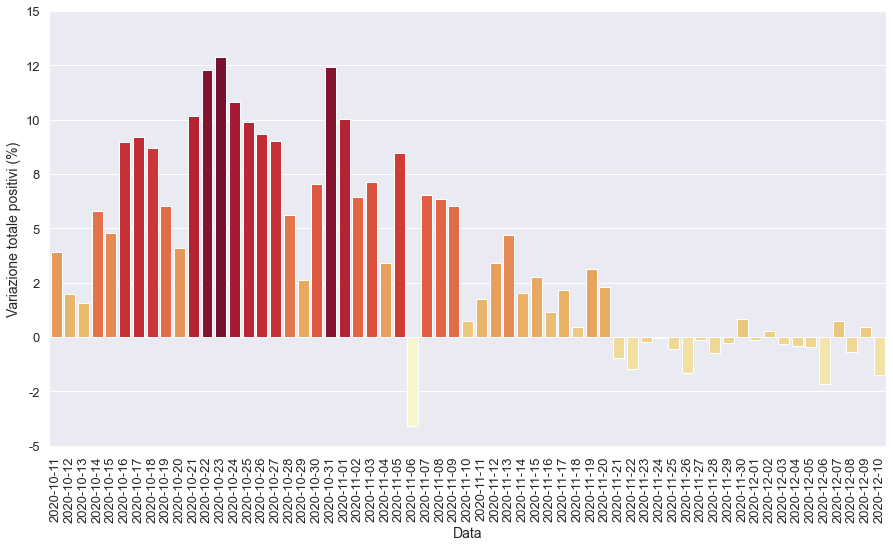

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

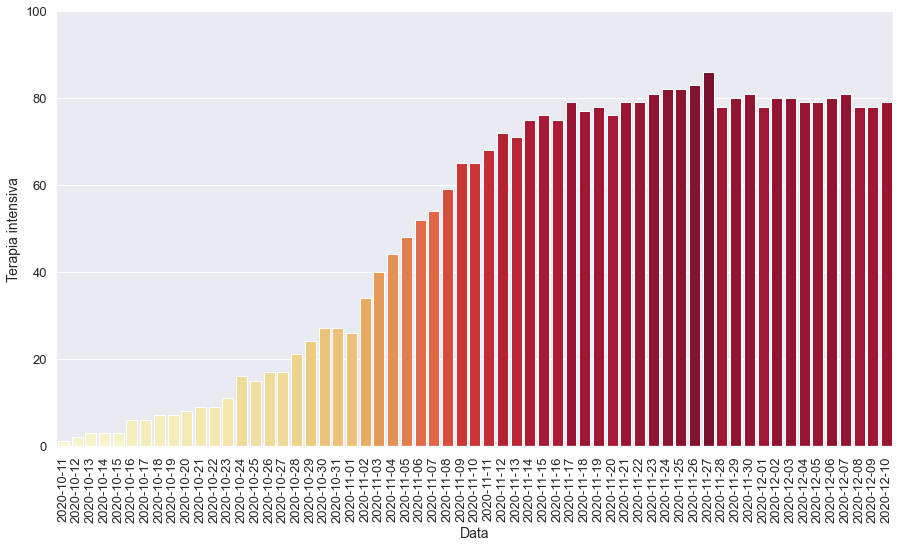

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

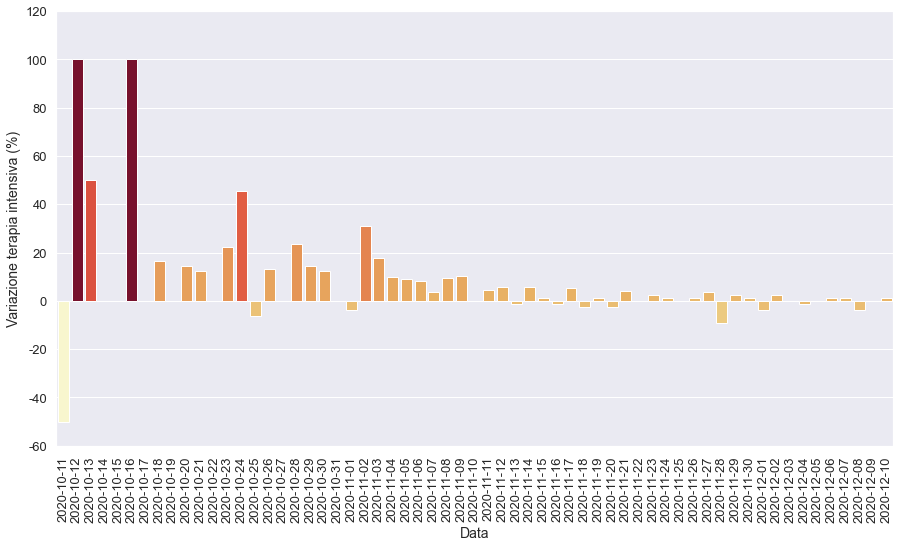

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

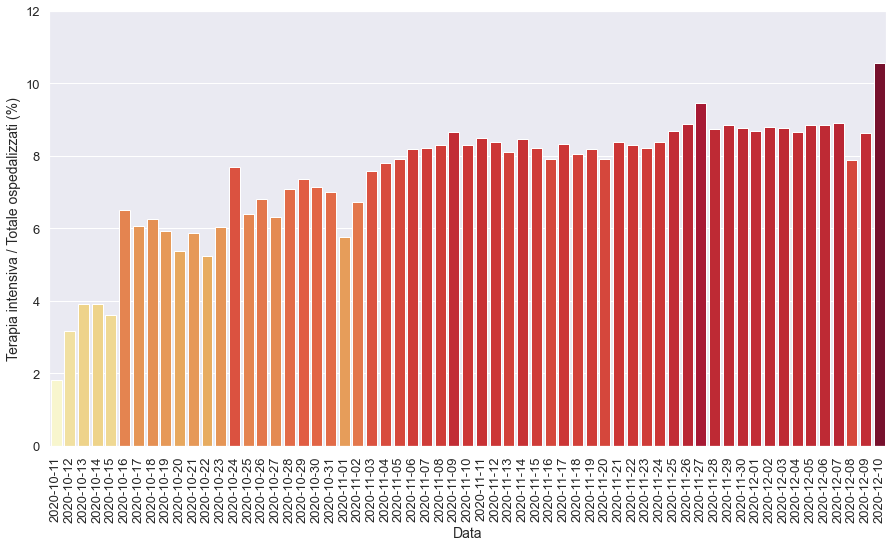

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

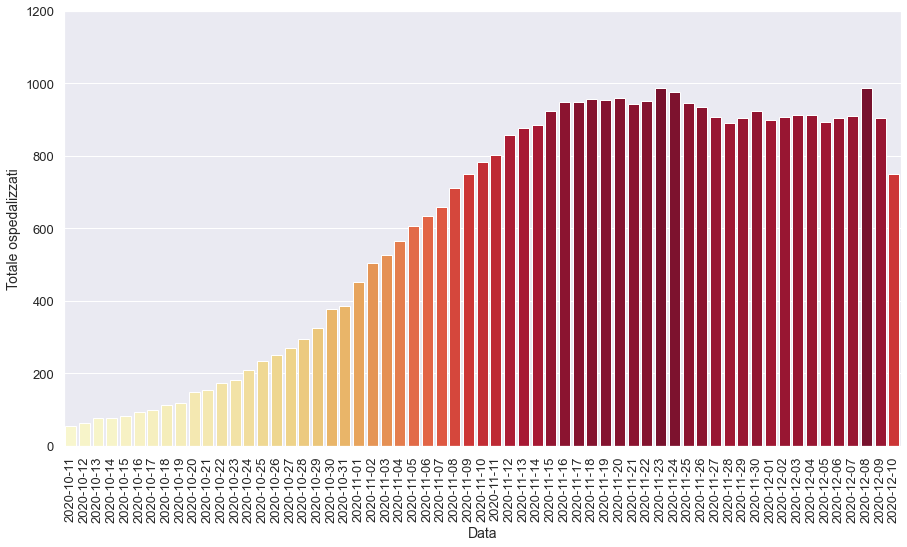

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

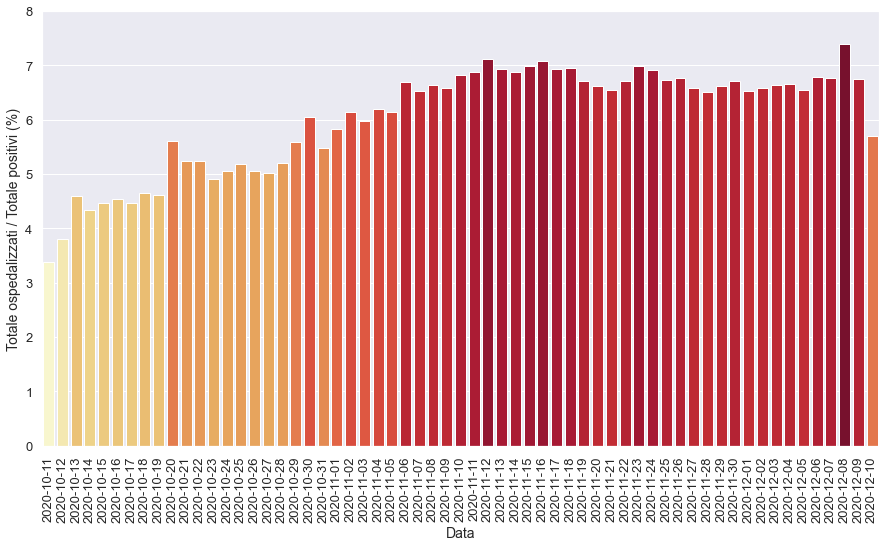

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

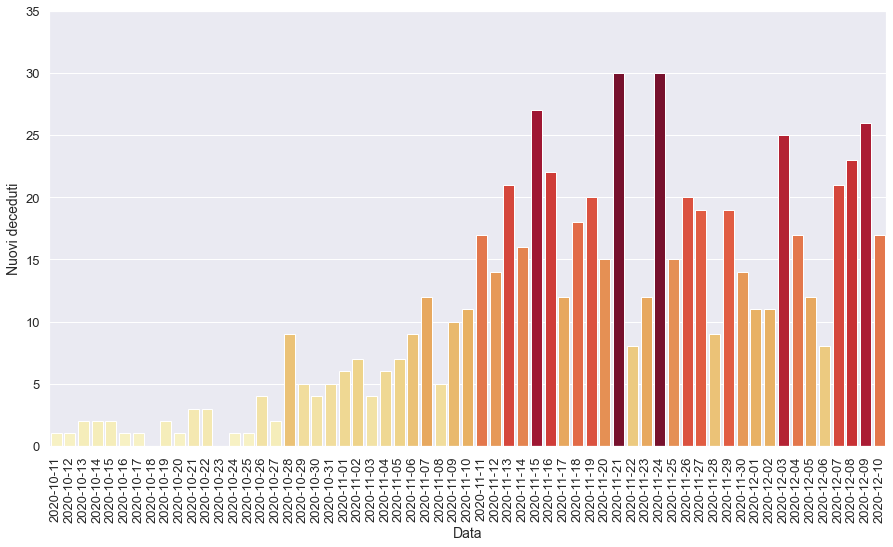

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

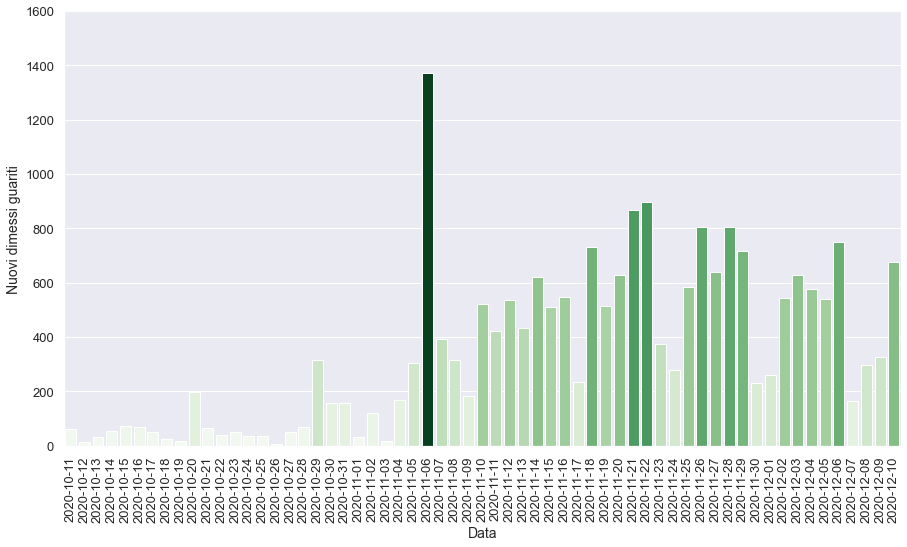

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-10T17:00:00,4,Trentino-Alto Adige,717,65,782,10690,11472,84,618,...,11.0,4235.0,1439.0,53.0,8.31,6.82,14.59,42.95,0.00,0.74
1,2020-11-11T17:00:00,4,Trentino-Alto Adige,734,68,802,10870,11672,200,639,...,17.0,6985.0,1578.0,180.0,8.48,6.87,9.15,40.49,4.62,1.74
2,2020-11-12T17:00:00,4,Trentino-Alto Adige,786,72,858,11210,12068,396,947,...,14.0,5779.0,2120.0,340.0,8.39,7.11,16.39,44.67,5.88,3.39
3,2020-11-13T17:00:00,4,Trentino-Alto Adige,806,71,877,11757,12634,566,1022,...,21.0,7833.0,1573.0,547.0,8.10,6.94,13.05,64.97,-1.39,4.69
4,2020-11-14T17:00:00,4,Trentino-Alto Adige,811,75,886,12007,12893,259,896,...,16.0,6877.0,1975.0,250.0,8.47,6.87,13.03,45.37,5.63,2.05
5,2020-11-15T17:00:00,4,Trentino-Alto Adige,849,76,925,12327,13252,359,896,...,27.0,5408.0,1516.0,320.0,8.22,6.98,16.57,59.10,1.33,2.78
6,2020-11-16T17:00:00,4,Trentino-Alto Adige,873,75,948,12458,13406,154,725,...,22.0,4008.0,1669.0,131.0,7.91,7.07,18.09,43.44,-1.32,1.16
7,2020-11-17T17:00:00,4,Trentino-Alto Adige,870,79,949,12746,13695,289,534,...,12.0,2958.0,1057.0,288.0,8.32,6.93,18.05,50.52,5.33,2.16
8,2020-11-18T17:00:00,4,Trentino-Alto Adige,879,77,956,12805,13761,66,817,...,18.0,7692.0,1965.0,59.0,8.05,6.95,10.62,41.58,-2.53,0.48
9,2020-11-19T17:00:00,4,Trentino-Alto Adige,876,78,954,13236,14190,429,962,...,20.0,6135.0,1790.0,431.0,8.18,6.72,15.68,53.74,1.30,3.12


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

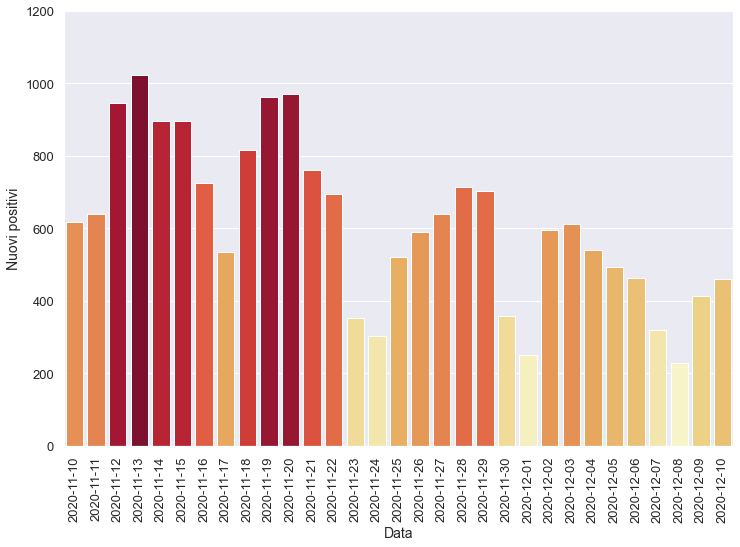

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

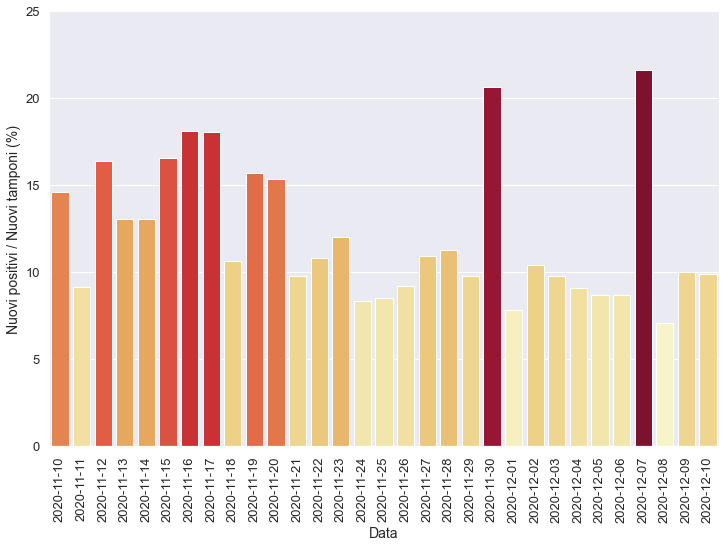

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

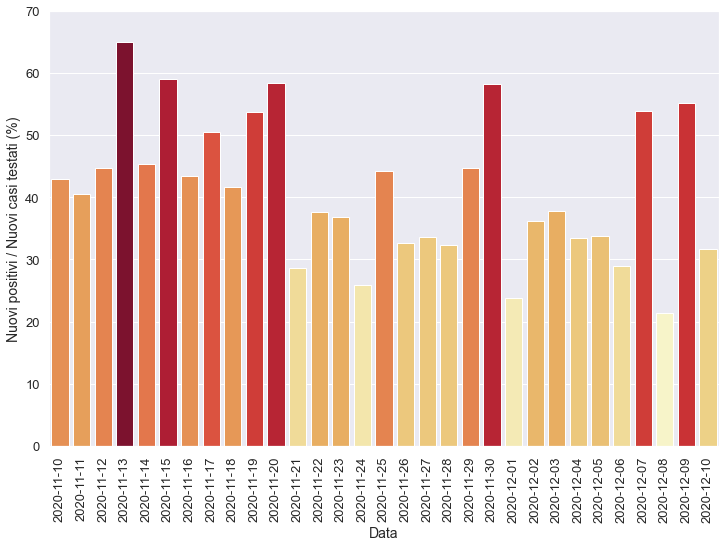

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

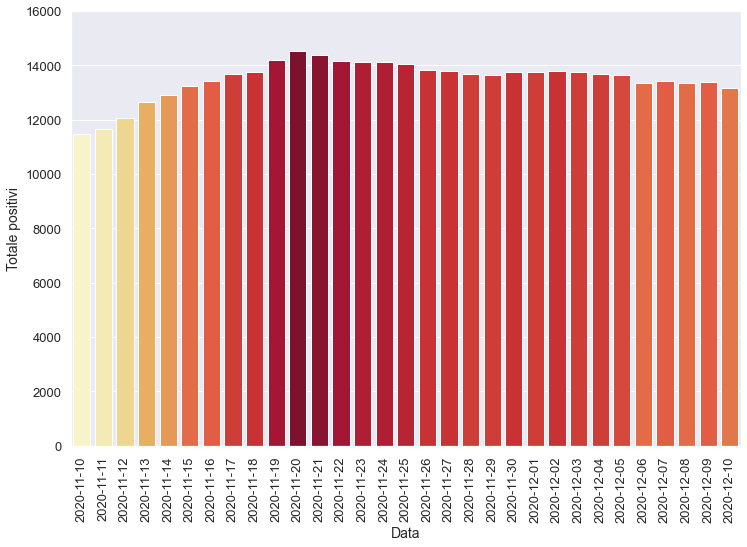

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

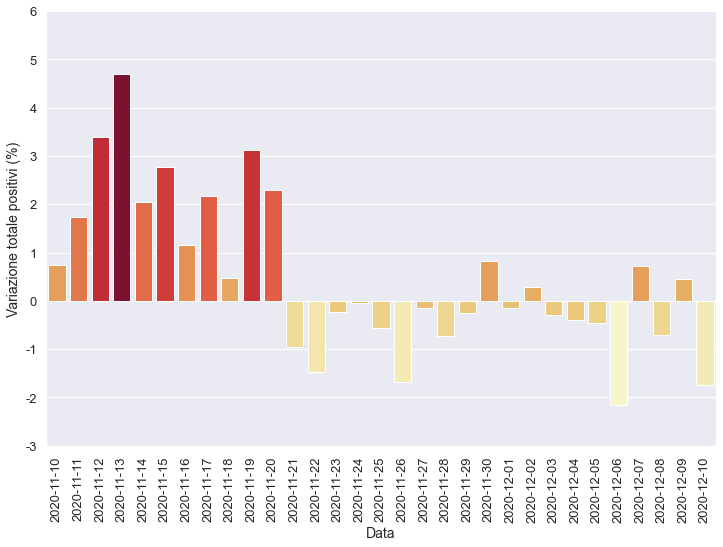

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

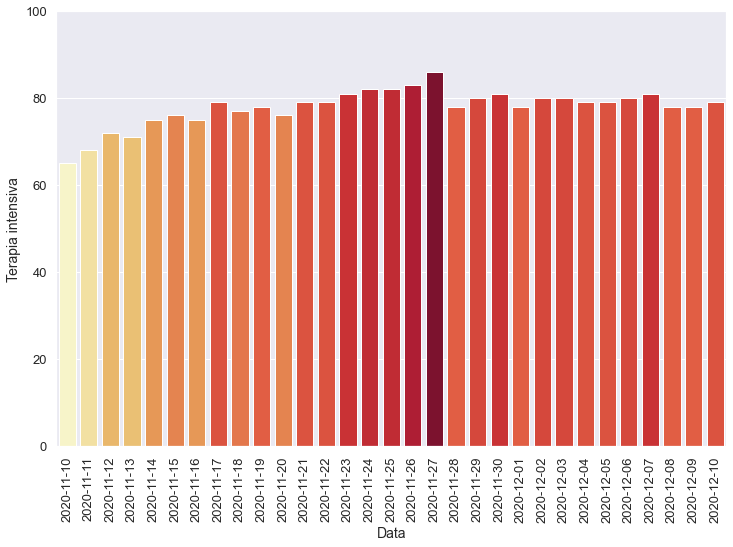

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

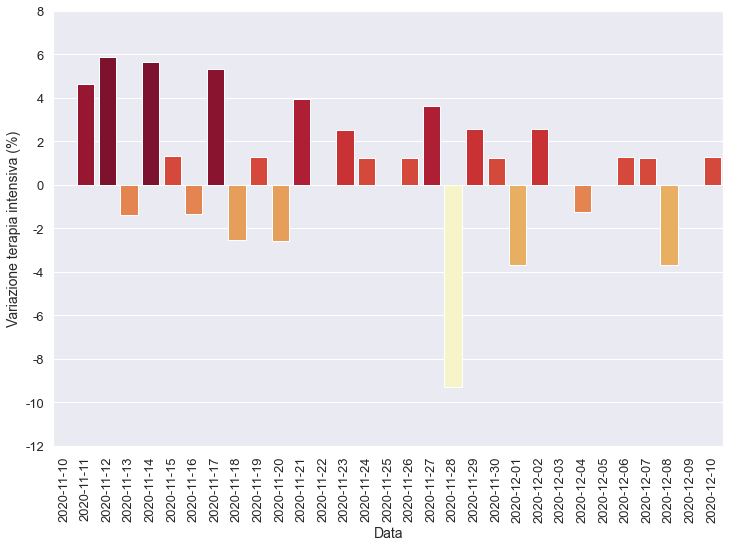

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

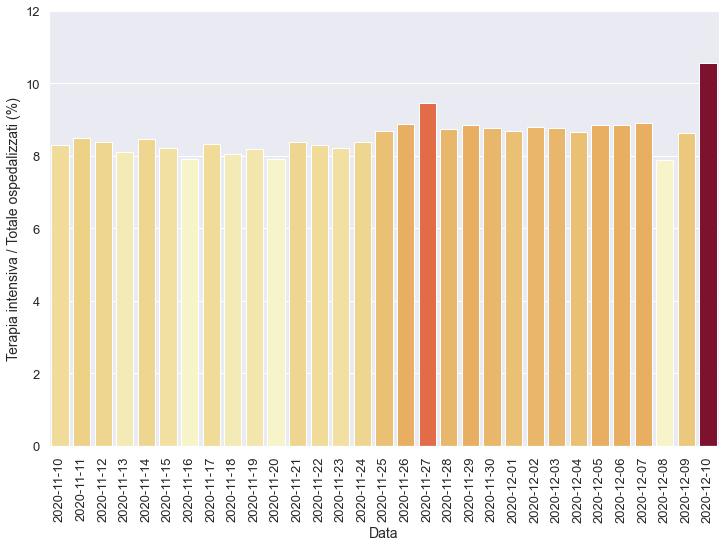

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

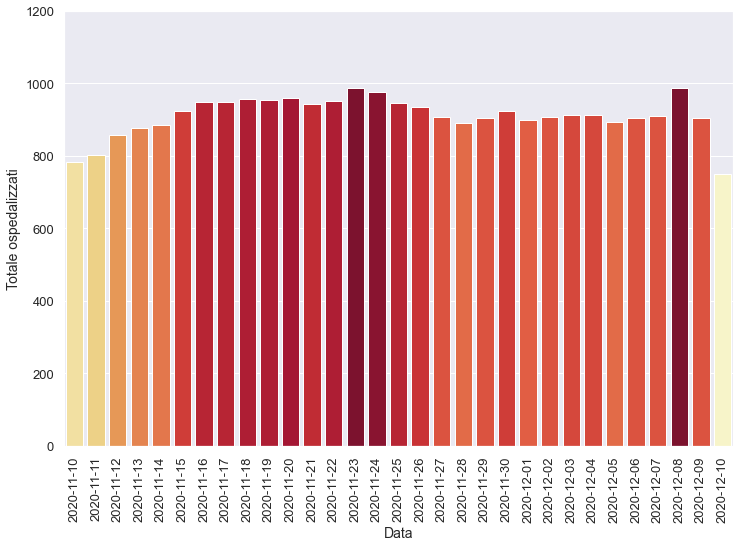

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

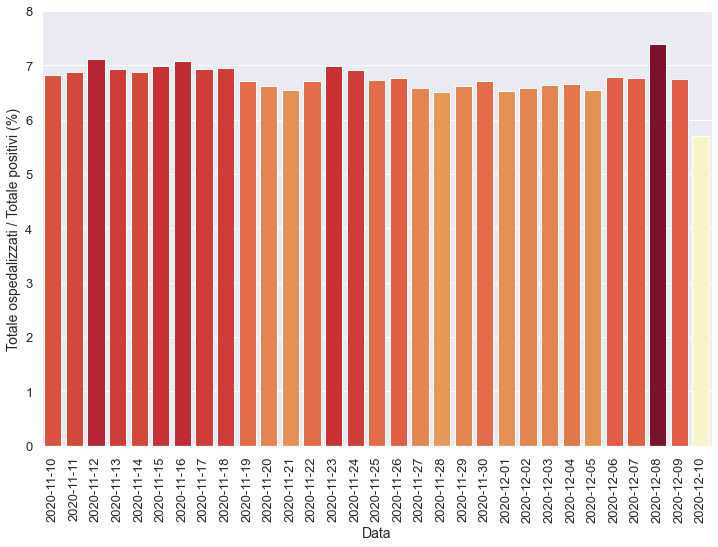

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

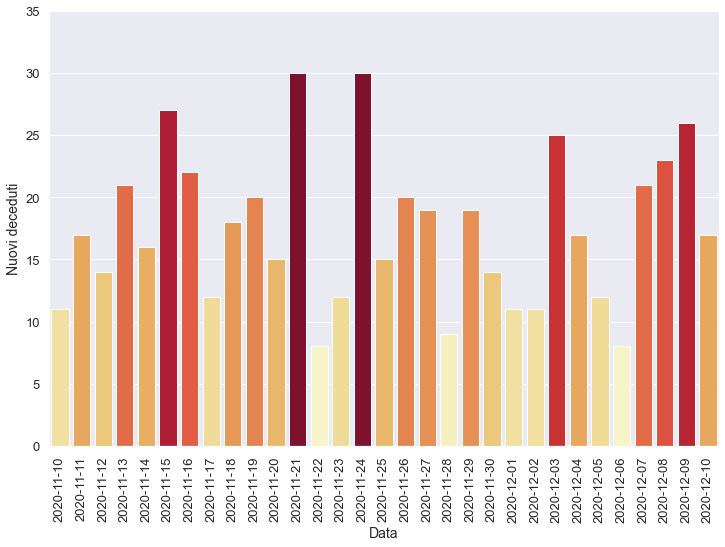

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

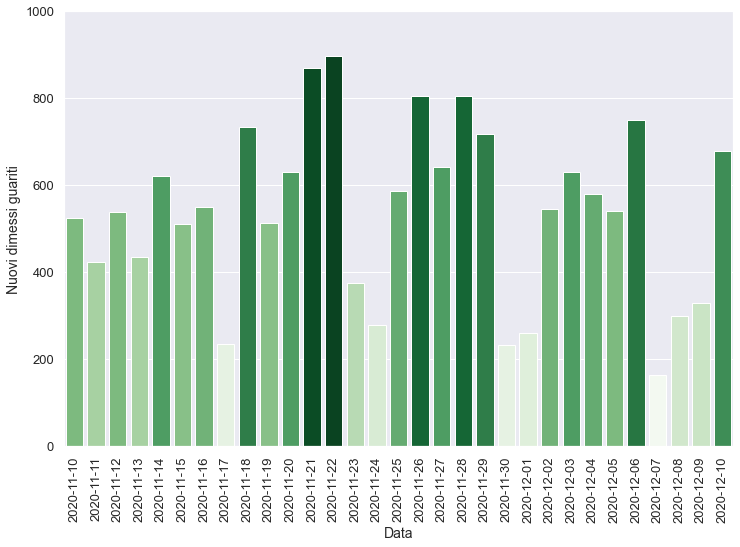

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-03T17:00:00,4,Trentino-Alto Adige,832,80,912,12835,13747,-41,613,...,25.0,6293.0,1619.0,-45.0,8.77,6.63,9.74,37.86,0.00,-0.30
1,2020-12-04T17:00:00,4,Trentino-Alto Adige,833,79,912,12780,13692,-55,540,...,17.0,5940.0,1611.0,-55.0,8.66,6.66,9.09,33.52,-1.25,-0.40
2,2020-12-05T17:00:00,4,Trentino-Alto Adige,814,79,893,12738,13631,-61,492,...,12.0,5664.0,1454.0,-42.0,8.85,6.55,8.69,33.84,0.00,-0.45
3,2020-12-06T17:00:00,4,Trentino-Alto Adige,824,80,904,12434,13338,-293,464,...,8.0,5367.0,1601.0,-304.0,8.85,6.78,8.65,28.98,1.27,-2.15
4,2020-12-07T17:00:00,4,Trentino-Alto Adige,828,81,909,12525,13434,96,320,...,21.0,1481.0,593.0,91.0,8.91,6.77,21.61,53.96,1.25,0.72
5,2020-12-08T17:00:00,4,Trentino-Alto Adige,909,78,987,12353,13340,-94,228,...,23.0,3227.0,1068.0,-172.0,7.90,7.40,7.07,21.35,-3.70,-0.70
6,2020-12-09T17:00:00,4,Trentino-Alto Adige,827,78,905,12495,13400,60,414,...,26.0,4136.0,750.0,142.0,8.62,6.75,10.01,55.20,0.00,0.45
7,2020-12-10T17:00:00,4,Trentino-Alto Adige,670,79,749,12418,13167,-233,461,...,17.0,4673.0,1452.0,-77.0,10.55,5.69,9.87,31.75,1.28,-1.74


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

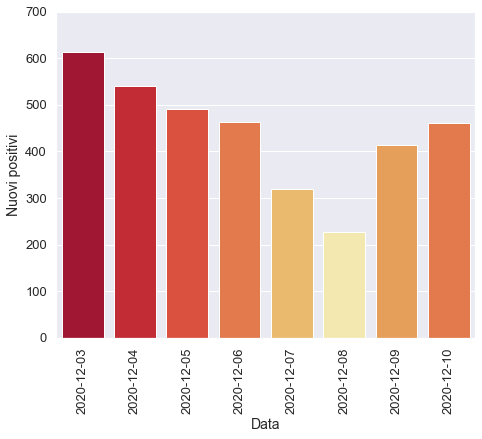

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

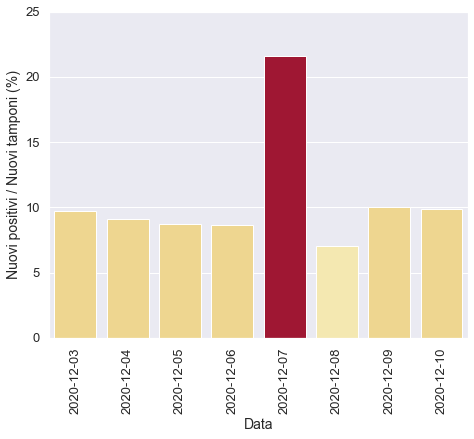

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

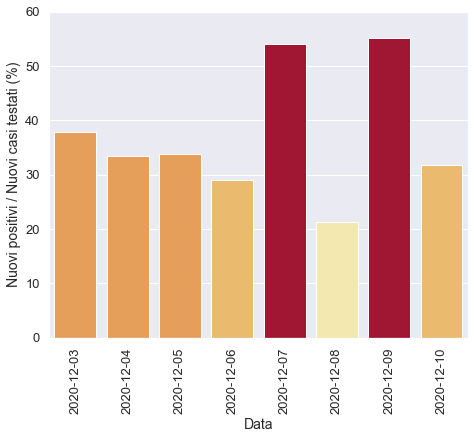

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

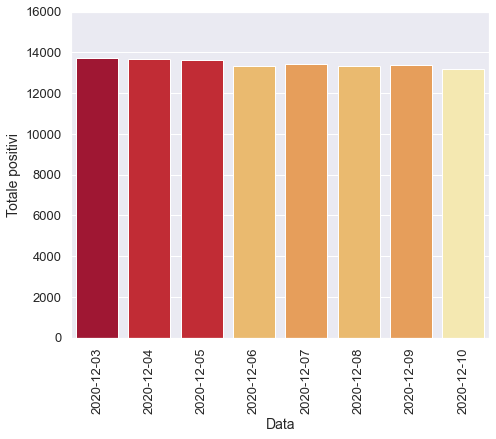

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

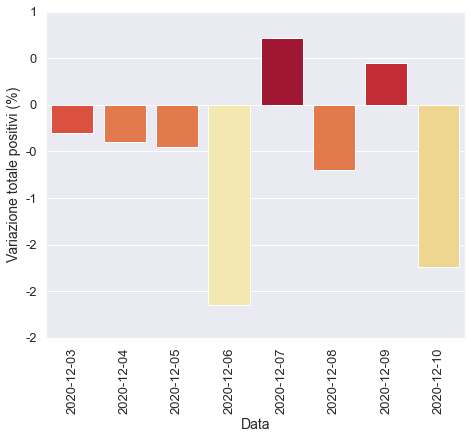

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

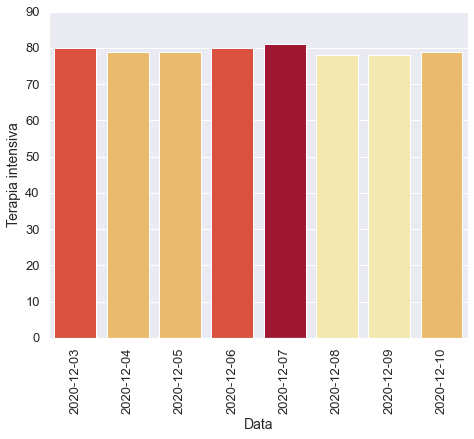

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

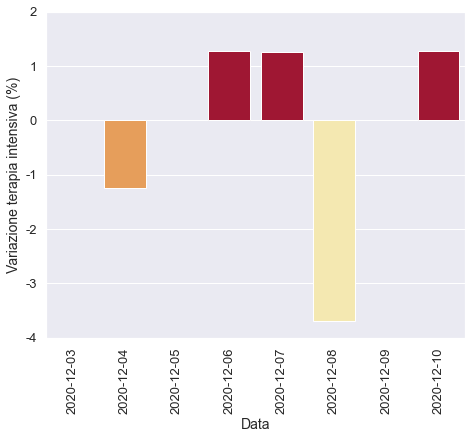

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

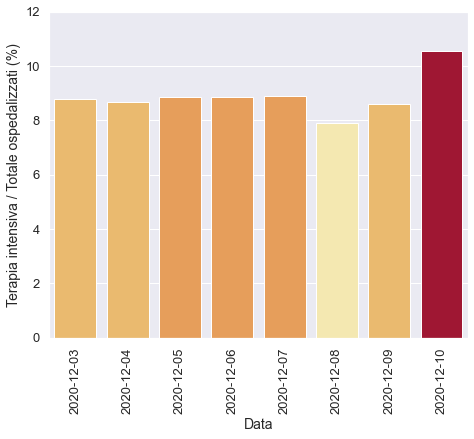

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

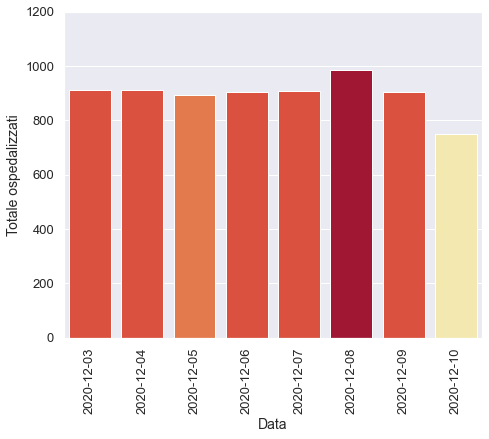

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

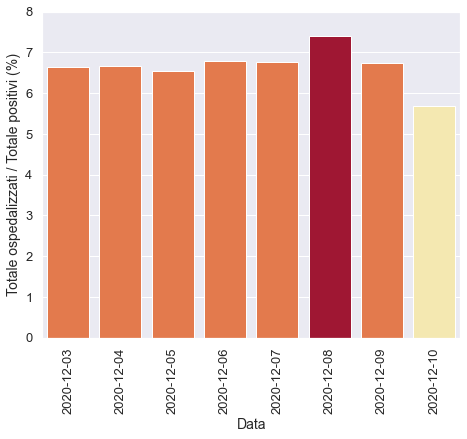

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

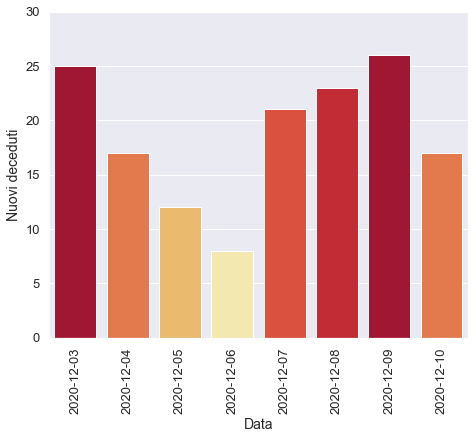

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

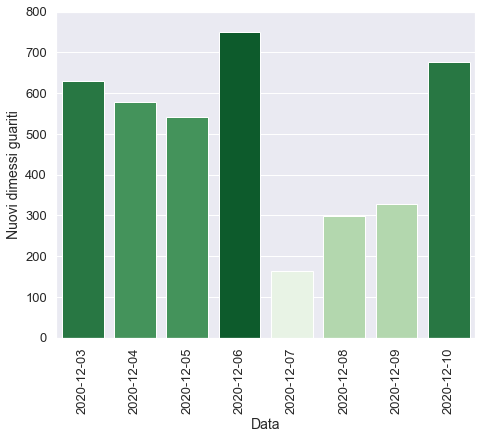

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)